# Food Desert Investigation -- Pre-processing & Training Data Development

## Imports

In [1]:
import os
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

### Importing test/train split

In [2]:
from sklearn.model_selection import train_test_split

## Data

In [3]:
df = pd.read_csv('new_clean_combined.csv')

In [4]:
df.head()

,FIPS,State,County,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,...,WIC_PART_2016,Population_Estimate_2016,White,African_american,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed
0,1001,AL,autauga,59447.5,31,44,31,3,525930.9601,32.910876,...,129159.9167,55242,414184,343485,7410,58715,157666,36853,162504,50774
1,1003,AL,baldwin,59447.5,118,156,236,29,525930.9601,32.910876,...,129159.9167,207712,414184,343485,7410,58715,157666,36853,162504,50774
2,1005,AL,barbour,59447.5,19,23,14,4,525930.9601,32.910876,...,129159.9167,25819,414184,343485,7410,58715,157666,36853,162504,50774
3,1007,AL,bibb,59447.5,15,7,7,5,525930.9601,32.910876,...,129159.9167,22576,414184,343485,7410,58715,157666,36853,162504,50774
4,1009,AL,blount,59447.5,27,23,12,5,525930.9601,32.910876,...,129159.9167,57517,414184,343485,7410,58715,157666,36853,162504,50774


### Grouping States by Region

In [14]:
df.dtypes

FIPS                          int64
State                        object
County                       object
CACFP_PART_2016             float64
CONVS16                       int64
FFR16                         int64
FSR16                         int64
GROC16                        int64
NSLP_PART_2016              float64
PCT_WICINFANTCHILD16        float64
PCT_WICWOMEN16              float64
RECFAC16                      int64
REDEMP_WICS16               float64
SBP_PART_2016               float64
SFSP_PART_2016              float64
SNAP_BBCE16                 float64
SNAP_PART_RATE16            float64
SPECS16                       int64
SUPERC16                      int64
State_Population_2016         int64
WICS16                      float64
WIC_PART_2016               float64
Population_Estimate_2016      int64
White                         int64
African_american              int64
Asian                         int64
Latino                        int64
HS_GED                      

In [15]:
df['State'].astype('category')

0       AL
1       AL
2       AL
3       AL
4       AL
        ..
3135    WY
3136    WY
3137    WY
3138    WY
3139    WY
Name: State, Length: 3140, dtype: category
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

According to the U.S. Census Bureau, the regions of the U.S. are Northeast, Midwest, South, and West. The states in each region are listed below:
* Northeast: Connecticut (CT), Maine (ME), Massachusetts (MA), New Hampshire (NH), Rhode Island (RI), Vermont (VT), New Jersey (NJ), New York (NY), Pennsylvania (PA)
* Midwest: Indiana (IN), Illinois (IL), Michigan (MI), Ohio (OH), Wisconsin (WI), Iowa (IA), Kansas (KS), Minnesota (MN), Missouri (MO), Nebraska (NE), North Dakota (ND), South Dakota (SD)
* South: Delaware (DE), District of Columbia (DC), Florida (FL), Georgia (GA), Maryland (MD), North Carolina (NC), South Carolina (SC), Virgina (VA), West Virginia (WV), Alabama (AL), Kentucky (KY), Mississippi (MS), Tennessee (TN), Arkansas (AR), Louisiana (LA), Oklahoma (OK), Texas (TX)
* West: Arizona (AZ), Colorado (CO), Idaho (ID), New Mexico (NM), Montana (MT), Utah (UT), Nevada (NV), Wyoming (WY), Alaska (AK), California (CA), Hawaii (HI), Oregon (OR), Washington (WA)

Sources:
* https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
* https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html

In [25]:
#regions = {'Northeast':['CT','ME','MA','NH','RI','VT','NJ','NY','PA'], 'Midwest':['IN','IL','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD'], 'South':['DE','DC','FL','GA','MD','NC','SC','VA','WV','AL','KY','MS','TN','AR','LA','OK','TX'], 'West':['AZ','CO','ID','NM','MT','UT','NV','WY','AK','CA','HI','OR','WA']}

In [26]:
regions = {'CT':'Northeast', 'ME':'Northeast','MA':'Northeast','NH':'Northeast','RI':'Northeast','VT':'Northeast','NJ':'Northeast','NY':'Northeast','PA':'Northeast',
           'IN':'Midwest','IL':'Midwest','MI':'Midwest','OH':'Midwest','WI':'Midwest','IA':'Midwest','KS':'Midwest','MN':'Midwest','MO':'Midwest','NE':'Midwest','ND':'Midwest','SD':'Midwest',
           'DE':'South','DC':'South','FL':'South','GA':'South','MD':'South','NC':'South','SC':'South','VA':'South','WV':'South','AL':'South','KY':'South','MS':'South','TN':'South','AR':'South','LA':'South','OK':'South','TX':'South',
           'AZ':'West','CO':'West','ID':'West','NM':'West','MT':'West','UT':'West','NV':'West','WY':'West','AK':'West','CA':'West','HI':'West','OR':'West','WA':'West'}

In [27]:
print(regions)

{'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'DE': 'South', 'DC': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South', 'SC': 'South', 'VA': 'South', 'WV': 'South', 'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South', 'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South', 'AZ': 'West', 'CO': 'West', 'ID': 'West', 'NM': 'West', 'MT': 'West', 'UT': 'West', 'NV': 'West', 'WY': 'West', 'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'}


In [28]:
df['Region'] = df.State.map(regions)

In [30]:
df[['State','Region']]

,State,Region
0,AL,South
1,AL,South
2,AL,South
3,AL,South
4,AL,South
...,...,...
3135,WY,West
3136,WY,West
3137,WY,West
3138,WY,West


### Creating Dummy Variables and Removing Categorical Variables

In [35]:
df_num = df.drop(['State','County'],axis=1)

In [37]:
df_num.head()

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,Population_Estimate_2016,White,African_american,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed,Region
0,1001,59447.5,31,44,31,3,525930.9601,32.910876,3.309759,6,...,55242,414184,343485,7410,58715,157666,36853,162504,50774,South
1,1003,59447.5,118,156,236,29,525930.9601,32.910876,3.309759,21,...,207712,414184,343485,7410,58715,157666,36853,162504,50774,South
2,1005,59447.5,19,23,14,4,525930.9601,32.910876,3.309759,0,...,25819,414184,343485,7410,58715,157666,36853,162504,50774,South
3,1007,59447.5,15,7,7,5,525930.9601,32.910876,3.309759,1,...,22576,414184,343485,7410,58715,157666,36853,162504,50774,South
4,1009,59447.5,27,23,12,5,525930.9601,32.910876,3.309759,4,...,57517,414184,343485,7410,58715,157666,36853,162504,50774,South


In [38]:
dummies = pd.get_dummies(df_num['Region'])

In [39]:
df_num = pd.concat([df_num,dummies],axis=1)

In [40]:
df_num.head()

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,Latino,HS_GED,Bachelors,Employed,Unemployed,Region,Midwest,Northeast,South,West
0,1001,59447.5,31,44,31,3,525930.9601,32.910876,3.309759,6,...,58715,157666,36853,162504,50774,South,False,False,True,False
1,1003,59447.5,118,156,236,29,525930.9601,32.910876,3.309759,21,...,58715,157666,36853,162504,50774,South,False,False,True,False
2,1005,59447.5,19,23,14,4,525930.9601,32.910876,3.309759,0,...,58715,157666,36853,162504,50774,South,False,False,True,False
3,1007,59447.5,15,7,7,5,525930.9601,32.910876,3.309759,1,...,58715,157666,36853,162504,50774,South,False,False,True,False
4,1009,59447.5,27,23,12,5,525930.9601,32.910876,3.309759,4,...,58715,157666,36853,162504,50774,South,False,False,True,False


In [41]:
df_num = df_num.drop('Region',axis=1)

In [42]:
df_num.head()

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed,Midwest,Northeast,South,West
0,1001,59447.5,31,44,31,3,525930.9601,32.910876,3.309759,6,...,7410,58715,157666,36853,162504,50774,False,False,True,False
1,1003,59447.5,118,156,236,29,525930.9601,32.910876,3.309759,21,...,7410,58715,157666,36853,162504,50774,False,False,True,False
2,1005,59447.5,19,23,14,4,525930.9601,32.910876,3.309759,0,...,7410,58715,157666,36853,162504,50774,False,False,True,False
3,1007,59447.5,15,7,7,5,525930.9601,32.910876,3.309759,1,...,7410,58715,157666,36853,162504,50774,False,False,True,False
4,1009,59447.5,27,23,12,5,525930.9601,32.910876,3.309759,4,...,7410,58715,157666,36853,162504,50774,False,False,True,False


In [45]:
df_num.dtypes

FIPS                          int64
CACFP_PART_2016             float64
CONVS16                       int64
FFR16                         int64
FSR16                         int64
GROC16                        int64
NSLP_PART_2016              float64
PCT_WICINFANTCHILD16        float64
PCT_WICWOMEN16              float64
RECFAC16                      int64
REDEMP_WICS16               float64
SBP_PART_2016               float64
SFSP_PART_2016              float64
SNAP_BBCE16                 float64
SNAP_PART_RATE16            float64
SPECS16                       int64
SUPERC16                      int64
State_Population_2016         int64
WICS16                      float64
WIC_PART_2016               float64
Population_Estimate_2016      int64
White                         int64
African_american              int64
Asian                         int64
Latino                        int64
HS_GED                        int64
Bachelors                     int64
Employed                    

In [47]:
df_num['Midwest'] = df_num['Midwest'].astype(int)
df_num['Northeast'] = df_num['Northeast'].astype(int)
df_num['South'] = df_num['South'].astype(int)
df_num['West'] = df_num['West'].astype(int)

NOTES:
* Define one variable to predict.
* Choose supervised/unsupervised
* Leave out county
* Could group state by region
* Unsupervised learning approach would be better -- clustering (try different approaches) -- explain best number of clusters
* Explore the results to see the best grouping method
* Play around with parameters

THIS ASSIGNMENT:
* Organize variables into train/test
* The unsupervised learning is done in the next assignment.
* Need to scale the data
* Group the categories

## Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)
scaled = scaler.transform(df_num)
df_scaled = pd.DataFrame(scaled, columns=df_num.columns)

<Axes: >

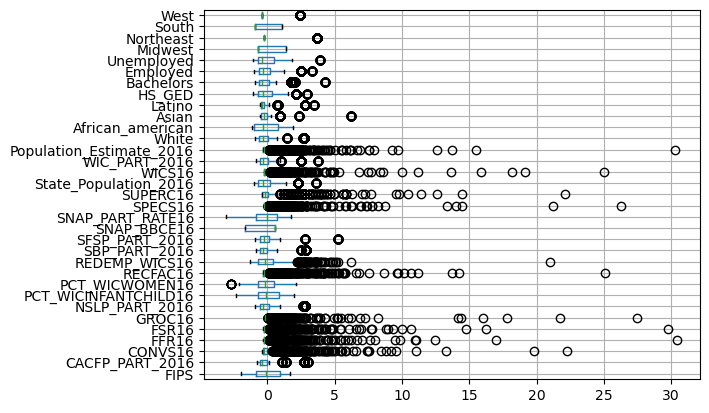

In [56]:
df_scaled.boxplot(vert=False)

## Cross-validation
I'm not sure how to do this without splitting the data. I don't have an X and y in this dataframe.
Is this something I need to do?

In [59]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
#cv_results = cross_val_score(reg, df_scaled, cv=kf)

## I think this is how I should do it?
First, I need to define my X and y

In [7]:
features_include = df.columns.drop('State','County')
X = df[features_include]
y = df[['State','County']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)